# **Exploratory Data Analysis**

The EDA will focus on and answer questions on several levels:

- Category Level
- Time Basis
- Transaction Level
- User level

## **Category Level**



- Which spending categories make up the largest share of total spending?
- Which categories have largest average transactoins?



## **Time Basis**

- How does total spending change over time (monthly)?
- Are there visible seasonal or cyclical patterns in spending?



## **Transaction Level**

- What does the distribution of transactions look like?
- Are there extreme outliers in transactions?



## **User Level**

- How is spending different among customers?
- Does a small number of users make up a large share of total spending?

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="ticks")

# Download latest version
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

#load up the dataset

print(os.listdir(path))

csv_path = os.path.join(path, 'credit_card_transactions.csv')

df = pd.read_csv(csv_path)

df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['credit_card_transactions.csv']


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [3]:
#renaming and cleaning up some columns for more clarity

df = df.rename(columns= {"first": "first_name", "last": "last_name", "category": "spending_type"})
df = df.drop("Unnamed: 0", axis=1)
df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [4]:
#filling in merch_zipcode NaN values

df["merch_zipcode"] = df["merch_zipcode"].fillna("Unknown")

df


,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,Unknown
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [5]:
#creating a summary table and calculating total spending, transaction average and number of transactions per spending type
spending_type_summary = (
    df.groupby("spending_type")["amt"]
      .agg(total_spend="sum", avg_transaction="mean", transactions="count")
      .sort_values("total_spend", ascending=False)
      .reset_index()
)
spending_type_summary


,spending_type,total_spend,avg_transaction,transactions
0,grocery_pos,14460822.38,116.960986,123638
1,shopping_pos,9307993.61,79.779155,116672
2,shopping_net,8625149.68,88.424076,97543
3,gas_transport,8351732.29,63.434572,131659
4,home,7173928.11,58.270139,123115
5,kids_pets,6503680.16,57.536871,113035
6,entertainment,6036678.56,64.210421,94014
7,misc_net,5117709.26,80.865095,63287
8,misc_pos,5009582.50,62.890999,79655
9,food_dining,4672459.44,51.086905,91461


In [6]:
#converting transaction dates to months

df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])


df["month_name"] = df["trans_date_trans_time"].dt.month_name()

df["month_num"] = df["trans_date_trans_time"].dt.month

df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,month_name,month_num
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,January,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown,January,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,January,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown,January,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,Unknown,June,6
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,June,6
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,June,6
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,June,6


In [7]:
#aggregating and calculating total spending per month in a summary table

monthly_summary = (
    df.groupby(["month_num", "month_name"])["amt"]
      .agg(total_spend="sum", transactions="count", avg_transaction="mean")
      .reset_index()
      .sort_values("month_num")
)


monthly_summary

,month_num,month_name,total_spend,transactions,avg_transaction
0,1,January,7422814.52,104727,70.877754
1,2,February,6974606.28,97657,71.419420
2,3,March,10190002.48,143789,70.867747
3,4,April,9452834.36,134970,70.036559
4,5,May,10304940.14,146875,70.161295
5,6,June,10143382.17,143811,70.532728
6,7,July,6044026.74,86596,69.795680
7,8,August,6047288.65,87359,69.223419
8,9,September,4949834.42,70652,70.059367
9,10,October,4851267.37,68758,70.555679


In [8]:
#checking if the column's values are numeric
df['amt'].info()

#running basic statistics; count,mean,std,min,max...

df['amt'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 1296675 entries, 0 to 1296674
Series name: amt
Non-Null Count    Dtype  
--------------    -----  
1296675 non-null  float64
dtypes: float64(1)
memory usage: 9.9 MB


count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

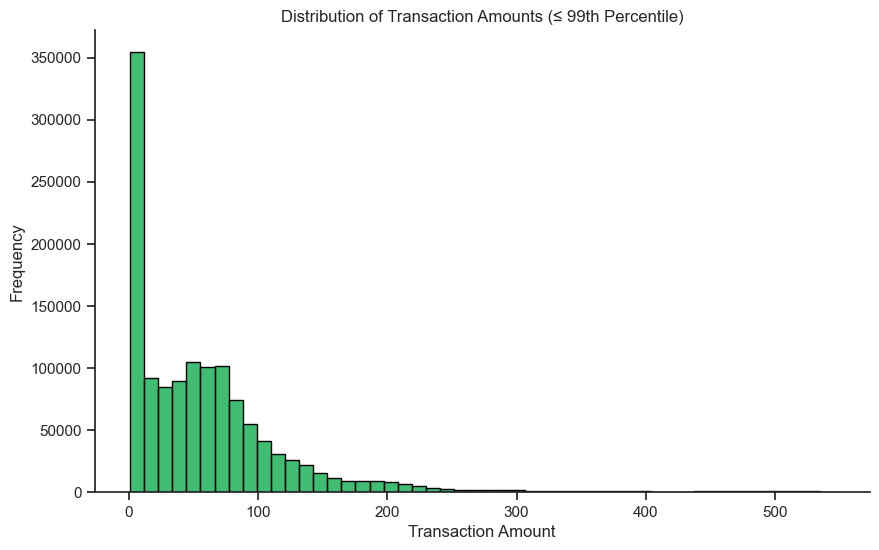

In [155]:
#visualising the distribution of basic statistics as a histogram

cutoff = df["amt"].quantile(0.99)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df[df["amt"] <= cutoff],
    x="amt",
    bins=50,
    edgecolor="black",
    color= "#00A644"
    
)
sns.despine()
plt.title("Distribution of Transaction Amounts (≤ 99th Percentile)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()



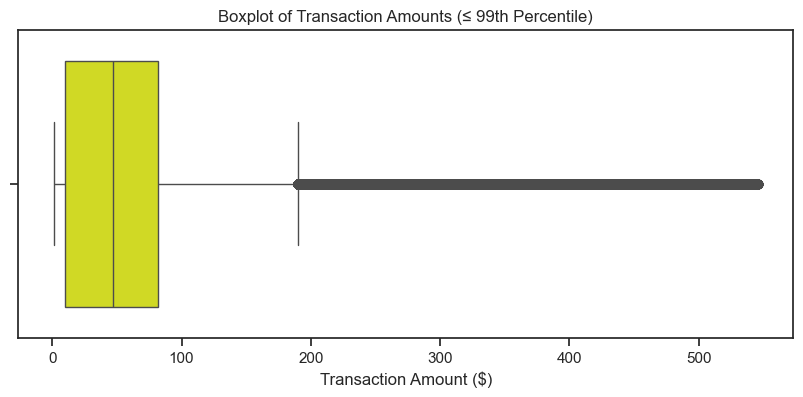

In [156]:
#visualising data as a boxplot

cutoff = df["amt"].quantile(0.99)

plt.figure(figsize=(10, 4))
sns.boxplot(x=df.loc[df["amt"] <= cutoff, "amt"],color="#EBF707")
plt.title("Boxplot of Transaction Amounts (≤ 99th Percentile)")
plt.xlabel("Transaction Amount ($)")
plt.show()




In [11]:
#grouping by customer id and finding total spending, number of transactions and average transaction

customer_summary = (
    df.groupby("cc_num")["amt"]
      .agg(total_spend="sum", transactions="count", avg_transaction="mean")
      .reset_index()
)
customer_summary


,cc_num,total_spend,transactions,avg_transaction
0,60416207185,85043.47,1518,56.023366
1,60422928733,105640.20,1531,69.000784
2,60423098130,58673.63,510,115.046333
3,60427851591,59129.61,528,111.987898
4,60487002085,25160.11,496,50.726028
...,...,...,...,...
978,4958589671582726883,97973.69,1476,66.377839
979,4973530368125489546,81508.22,1040,78.373288
980,4980323467523543940,39600.18,532,74.436429
981,4989847570577635369,88195.62,1007,87.582542


## Overview of Exploratory Visualizations

The following figures show a multi level exploratory analysis of consumer
spending behavior using five complementary visualizations.

Each figure focuses on a different analytical level:

- **Category Level Spending (Total)** – compares total spending across categories.
- **Category Level Spending (Average)** – compares average transaction size by category.
- **Time Based Spending Trend** – shows how total spending changes over time on a monthly basis.
- **Transaction Level Distribution** – illustrates the distribution of individual transaction amounts.
- **User Level Spending** – examines how total spending is distributed across customers.

Together, these plots provide a comprehensive view of spending patterns,
variability, and concentration within the dataframe.


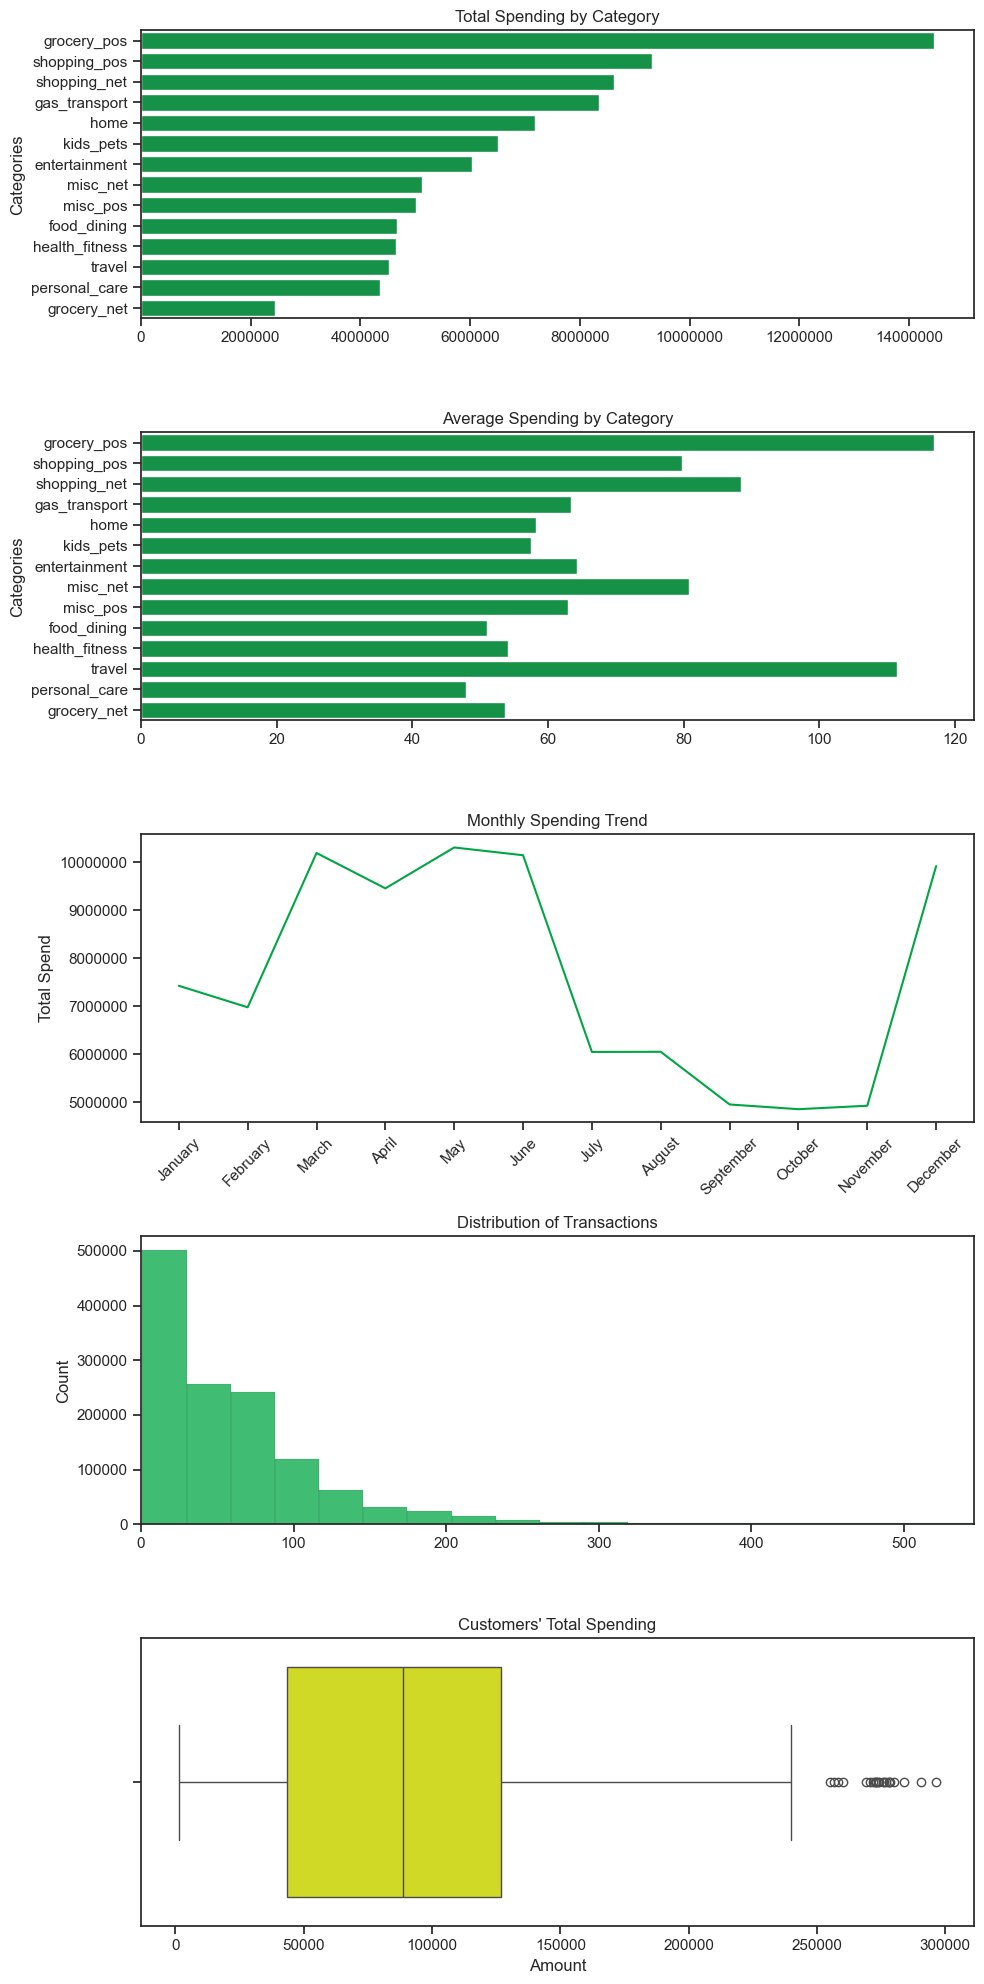

In [167]:
#plotting figures for comparison. total spending by category, avg transaction per category, monthly spending trend, transaction distribution, and customers' total spending

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(10, 20)) #creating the whole figure, canvas(fig), and axes or rather each individual figure (ax1,ax2....)

#plotting a horizontal barchart for spending by category
sns.barplot(
    data=spending_type_summary,
    y="spending_type",
    x="total_spend",
    orient="h",
    ax=ax1,
    color="#00A644",
    
    
    )

ax1.set_title("Total Spending by Category")
ax1.set_ylabel("Categories")
ax1.set_xlabel("")
ax1.ticklabel_format(style="plain", axis="x")

#plotting a horizontal barchart for average transaction by category

sns.barplot(
    data=spending_type_summary,
    y="spending_type",
    x="avg_transaction",
    orient="h",
    ax=ax2,
    color="#00A644",
    
    )

ax2.set_title("Average Spending by Category")
ax2.set_ylabel("Categories")
ax2.set_xlabel("")
ax2.ticklabel_format(style="plain", axis="x")

#plotting 3rd figure, monthly spending trend as a line

sns.lineplot(

    data=monthly_summary,
    y="total_spend",
    x="month_name",
    ax=ax3,
    color="#00A644",
)

ax3.set_title("Monthly Spending Trend")
ax3.set_ylabel("Total Spend")
ax3.set_xlabel("")
ax3.tick_params(axis="x", rotation=45)
ax3.ticklabel_format(style="plain", axis="y")


#plotting the distribution of transactions

sns.histplot(

    data=df,
    x="amt",
    bins=1000,
    edgecolor="black",
    ax=ax4,
    color="#00A644",
    
)


ax4.set_title("Distribution of Transactions")
ax4.set_ylabel("Count")
ax4.set_xlabel("")
ax4.set_xlim(left=0, right=df["amt"].quantile(0.99))
ax4.ticklabel_format(style="plain", axis="x")

#plotting customers' total spending

sns.boxplot(

    data=customer_summary,
    x="total_spend",
    orient="h",
    ax=ax5,
    color="#EBF707",
    
)

ax5.set_title("Customers' Total Spending")
ax5.set_ylabel("")
ax5.set_xlabel("Amount")
ax5.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()

## Interpretation of The Results

The plots reveal several key patterns in consumer spending behavior.

At the category level, spending is unevenly distributed, with a small number of
categories accounting for a large share of total spending. Average transaction
sizes also vary across categories, indicating differences in buying
behavior by category type.

The monthly spending trend shows clear variation over time, suggesting potential
seasonal or cyclical effects in consumer spending. Some months exhibit
higher total spending than others.

Transaction level analysis reveals a strongly right skewed distribution, where
most purchases are relatively small, but a small number of high value transactions
significantly increase the average transaction amount.

Finally, user level analysis indicates that total spending is concentrated among a
subset of customers, with a minority of users contributing disproportionately to
overall spending.
